# Análisis de becas CONACYT

Como parte de la práctica de analisis de datos, he tomado el dataset _'Becas_Nuevas_al_Extranjero_por_Genero_y_Pais_de_Destino_2014.csv'_ de la [Bases de datos abiertos S190](https://www.siicyt.gob.mx/index.php/s190-becas-de-posgrado-y-otras-modalidades-de-apoyo-a-la-calidad?id=219:bases-de-datos-abiertas-s190;catid=10) perteneciente al siicty. Estos datos pertenecen a las becas otorgadas por el CONACYT en el año 2014.

In [1]:
#importamos las librerías necesarias para trabajar con los datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Leemos los datos del archivo csv
becas = pd.read_csv('Datasets\Becas_Nuevas_al_Extranjero_por_Genero_y_Pais_de_Destino_2014.csv', encoding='latin-1', header=0)

#Nos deshacemos de las celdas sin valores
becas=becas.dropna()

#Vemos la información del dataset
print(becas.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2513 entries, 0 to 2512
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   APELLIDO PATERNO      2513 non-null   object
 1   APELLIDO MATERNO      2513 non-null   object
 2   NOMBRE                2513 non-null   object
 3   AREA DE CONOCIMIENTO  2513 non-null   object
 4   NIVEL                 2513 non-null   object
 5   INSTITUCION           2513 non-null   object
 6   PAIS                  2513 non-null   object
 7   GENERO                2513 non-null   object
dtypes: object(8)
memory usage: 176.7+ KB
None


Podemos consultar cuáles fueron los cinco principales paises que más eligieron los estudiantes becados para la continuación de sus estudios en el año 2014

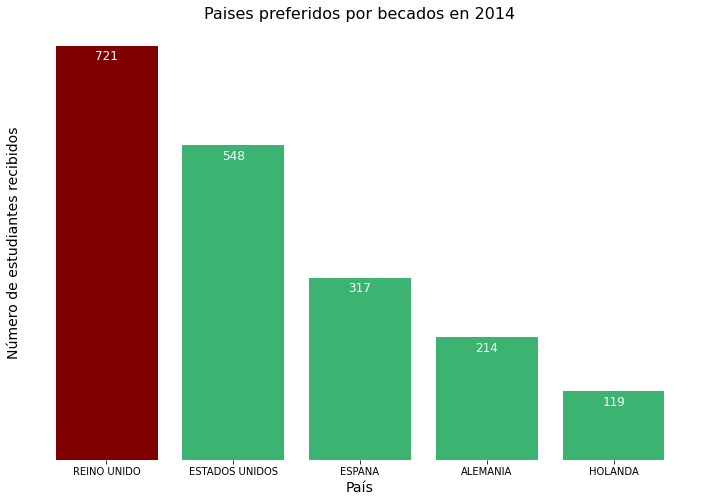

In [2]:
#Inicializamos columna para obtener suma
becas['NUM ESTUDIANTES'] = 0

#Agrupamos los datos y obtenemos la suma de los estudiantes de acuerdo al país que eligen para la continuación de estudios
pais = becas.groupby('PAIS')['NUM ESTUDIANTES'].count().sort_values(ascending=False)[:5]

#Preparamos los datos obtenidos para graficarlos
y = list(pais.to_dict().values())
x = list(pais.to_dict().keys())


#Comenzamos a graficar los datos
plt.figure(figsize=(12, 8))
bars = plt.bar(x, y, color='mediumseagreen',align='center')
bars[0].set_color('maroon')

#Establecemos las leyendas de los ejes del gráfico
plt.ylabel("Número de estudiantes recibidos",fontsize=14)
plt.xlabel("País",fontsize=14)
plt.title("Paises preferidos por becados en 2014", fontsize=16)


#Colocamos el número de alumnos totales en cada una de las barras
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 25, str(int(bar.get_height())) , 
                 ha='center', color='w', fontsize=12)    

#Nos deshacemos del marco de la gráfica
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#Removemos las etiquetas del eje para obtener una mejor visualización de información
plt.yticks([])


#Mostramos el gráfico
plt.show()

Veamos qué genero de estudiantes obtuvo más becas para ir al extranjero a estudiar en 2014

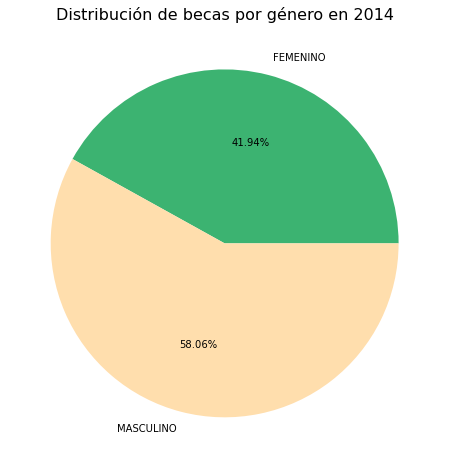

In [3]:
#Renombramos los datos del dataset
gen_replace = {'M': 'MASCULINO', 'F':'FEMENINO'}
becas['GENERO'].replace(gen_replace, inplace=True)

#Agrupamos la información y obtenemos la suma de estudiantes por género
genero = becas.groupby('GENERO')['NUM ESTUDIANTES'].count()

#Preparamos los datos obtenidos para ser graficados
y = list(genero.to_dict().values())
x = list(genero.to_dict().keys())

#Trazamos la gráfica de pastel
plt.figure(figsize=(12, 8))
plt.pie(y,labels=x,autopct="%0.2f%%",colors=['mediumseagreen','navajowhite'])
plt.title("Distribución de becas por género en 2014", fontsize=16)

#Mostramos el resultado
plt.show()

Ahora, veamos qué nivel de becas fueron mayormente otorgadas a los estudiantes

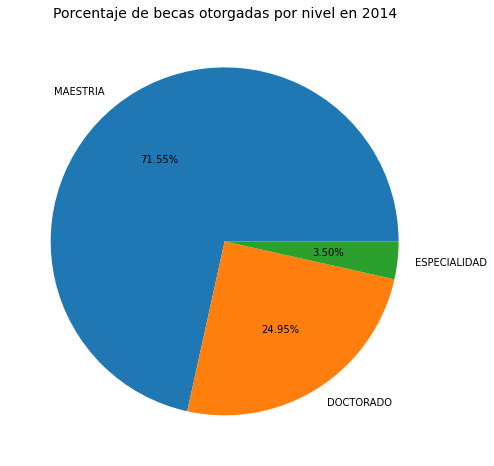

In [4]:
#Limpiamos la información de la columna "NIVEL" del dataset
becas['NIVEL'] = becas['NIVEL'].str.extract('[0.9]\.* ([A-Z]*)')
nivel_replace={'MAE':'MAESTRIA','DOC':'DOCTORADO','ESP':'ESPECIALIDAD'}
becas.replace(nivel_replace, inplace=True)

#Agrupamos los datos y contamos el número de estudiantes de acuerdo al nivel
nivel = becas.groupby('NIVEL')['NUM ESTUDIANTES'].count().sort_values(ascending=False)

#Preparamos los datos para ser graficados
y1 = list(nivel.to_dict().values())
x1 = list(nivel.to_dict().keys())

#Comenzamos a graficar los datos
plt.figure(figsize=(12, 8))
plt.pie(y1, labels=x1, autopct="%0.2f%%")

#Mostramos el gráfico resultante
plt.title("Porcentaje de becas otorgadas por nivel en 2014",fontsize=14)
plt.show()

Así estuvieron distribuidas las becas de acuerdo al área de conocimientos

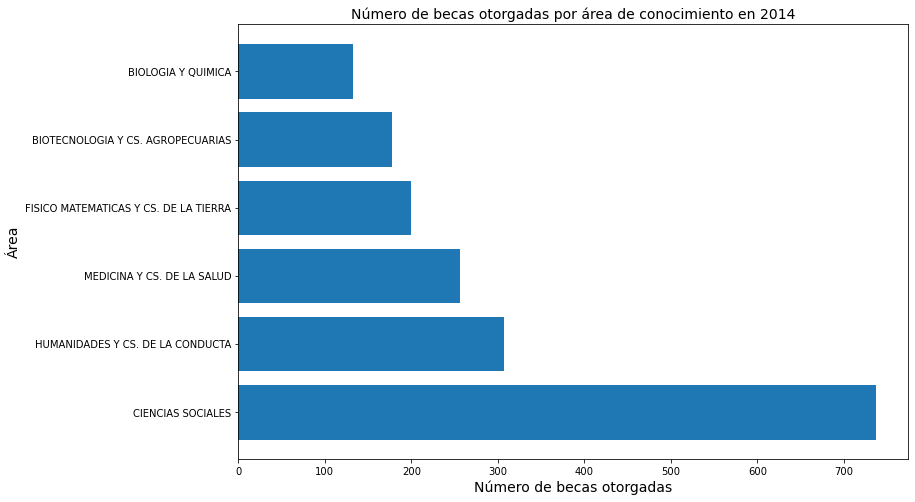

In [5]:
#Limpiamos los datos de la columna 'AREA DE CONOCIMIENTO'
becas['AREA DE CONOCIMIENTO'] = becas['AREA DE CONOCIMIENTO'].str.extract('[A-Z]\.* ([A-Z ]* .*)')

#Agrupamos por área de conocimiento y contamos el número de estudiantes en cada una de ellas
area = becas.groupby('AREA DE CONOCIMIENTO')['NUM ESTUDIANTES'].count().sort_values(ascending=False)

#Preparamos los datos para ser graficados
y2 = list(area.to_dict().values())
x2 = list(area.to_dict().keys())

#Comenzamos a graficar los datos
plt.figure(figsize=(12, 8))
plt.barh(x2, y2)

#Mostramos el gráfico
plt.ylabel("Área",fontsize=14)
plt.xlabel("Número de becas otorgadas",fontsize=14)
plt.title("Número de becas otorgadas por área de conocimiento en 2014",fontsize=14)
plt.show()